In [1]:
import numpy as np
import pandas as pd
import os

## Fetching Training Files

In [2]:
# fetching file from train dataset box_transcript_labels
path = '/home/jatin/Infrrd_Assignment/dataset/train/boxes_transcripts_labels'
dir_list = os.listdir(path)
print(dir_list)

['5699060b-563b-4d0f-ba2a-18715a6ed9e7_document-2_page-1.tsv', 'ebbcffa9-deba-45a9-bbf6-dd17ef362249_document-4_page-1.tsv', 'e8862a2b-6079-47d1-86ee-ee716e252f84_document-2_page-1.tsv', '180a608b-321d-418b-9643-5ca2bc934dcb_document-1_page-1.tsv', 'b07db877-5f71-4af2-be8b-8d17d10aaece_document-7_page-1.tsv', 'ed017ee4-9a91-40ad-9867-e85ebb4c0d77_document-5_page-1.tsv', 'a3283f46-84e8-46db-a456-44e2d4c5e256_document-6_page-1.tsv', '5c2f28f0-172b-4d27-929f-21c9cac4f2c9_document-7_page-1.tsv', '9acb0929-5efa-47b2-b81f-2b4c4efec897_document-6_page-1.tsv', '3cfcc912-7587-4c89-8b2f-b0b573abf658_document-9_page-1.tsv', '7dd13ad2-a479-434a-b92b-aae74336f438_document-6_page-1.tsv', 'd6689c00-7936-40d5-a3ef-902d8a5fa56a_document-5_page-1.tsv', '4031dfae-5c16-4513-af30-4795079ca20e_document-2_page-1.tsv', 'cec4e511-db50-4bde-b237-9fd2dc1bc52a_document-3_page-1.tsv', '54b45f44-2869-41dc-babc-2c27b977353f_document-9_page-1.tsv', 'd9017fac-dd95-4981-8670-ca8cf6e2b838_document-2_page-1.tsv', 'ad080f

## Extracting Training Data

In [3]:
count = 0
list1 = list()
for name in dir_list:
    loc = '/home/jatin/Infrrd_Assignment/dataset/train/boxes_transcripts_labels/'+name
    df = pd.read_csv(loc,header=None)
    df.columns = ['start_index','end_index','x_top_left','y_top_left','x_bottom_right','y_bottom_right','transcript','field']
    mask = df['field'] == 'OTHER'
    df = df[~mask]
    df = df.iloc[:,[-2,-1]]
    df = df.reset_index()
    df.drop(columns=['index'],inplace=True)
    df = df.groupby(['field'])['transcript'].apply(' '.join).reset_index()
    df = df.set_index('field')
    df = df.T
    new_columns = ['employerName','employerAddressStreet_name','employerAddressCity','employerAddressState','employerAddressZip','einEmployerIdentificationNumber','employeeName'
,'ssnOfEmployee','box1WagesTipsAndOtherCompensations','box2FederalIncomeTaxWithheld','box3SocialSecurityWages','box4SocialSecurityTaxWithheld','box16StateWagesTips','box17StateIncomeTax'
,'taxYear']
    df = df.reindex(columns=new_columns)
    arr = list(df.loc['transcript'].values)
    list1.append(arr)

train_dataframe = pd.DataFrame(list1,columns=new_columns)
train_dataframe

    

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571 . 07,50219 . 14,180256.5,13789. 62,118916 . 12,7477 . 28,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,NaN,NaN,271548.23,NaN,NaN,NaN,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.35,61783.77,223287.32,17081 .48,NaN,9258.08,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,NaN,138 89 . 11,88282 .45,6753. 61,37532 83,2775 .2,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.23,23526.27,137908-53,10550.0,83795.31,5470.95,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631 .58,36172 . 8,253646.73,19403 .97,101515. 79,11831 .66,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625. 39,35884.32,200379 . 52,15329 . 03,99246 . 64,10098 . 15,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464 . 93,77307. 24,198314.2,15171 . 04,123217 . 09,6068. 69,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,. 63644 41,19040.33,. 70927 46,5425.95,34905 43,3220 73,2019


In [4]:
length = len(train_dataframe)
row_with_nan = length-len(train_dataframe.dropna())

In [5]:
(row_with_nan/length)*100 # Percentage of drop rows

51.0

# Insight
    1. Since 51% of rows are NaN, hence can't delete all rows.
    2. Assuming the TipsAndOtherCompensations, FederalIncomeTaxWithheld, SocialSecurityWages, SocialSecurityTaxWithheld,StateWagesTips,StateIncomeTax by mean.

In [6]:
train_dataframe.dtypes

employerName                          object
employerAddressStreet_name            object
employerAddressCity                   object
employerAddressState                  object
employerAddressZip                    object
einEmployerIdentificationNumber       object
employeeName                          object
ssnOfEmployee                         object
box1WagesTipsAndOtherCompensations    object
box2FederalIncomeTaxWithheld          object
box3SocialSecurityWages               object
box4SocialSecurityTaxWithheld         object
box16StateWagesTips                   object
box17StateIncomeTax                   object
taxYear                               object
dtype: object

In [7]:
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

def to_float(text):
    number = text
    if isnan(number):
        return np.NaN
    if '.' in number or '-' in number:
        count = 0
        r = number.split('.')
        if len(r):
            if r[0] == 'nan':
                return np.NaN
            else:
                temp = ""
                for i in r:
                    temp += i.strip()
                    if count == 0:
                        temp += '.'
                        count += 1
        else:
            r = number.splits('-')
            if len(r):
                if r[0] == 'nan' or r[0] == 'NaN':
                    return np.NaN
                else:
                    temp = ""
                    for i in r:
                        temp += i.strip()
                        if count == 0:
                            temp += '.'
                            count += 1
        try:
            return float(temp)
        except ValueError:
            return np.NaN


In [8]:
train_dataframe['box1WagesTipsAndOtherCompensations'].apply(lambda x: to_float(str(x)))

0      247571.07
1            NaN
2      186876.35
3            NaN
4      170401.23
         ...    
595    219631.58
596    196625.39
597    224464.93
598          NaN
599    221413.09
Name: box1WagesTipsAndOtherCompensations, Length: 600, dtype: float64

In [9]:
train_dataframe['box1WagesTipsAndOtherCompensations']=train_dataframe['box1WagesTipsAndOtherCompensations'].apply(lambda x: to_float(str(x)))

In [10]:
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.07,50219 . 14,180256.5,13789. 62,118916 . 12,7477 . 28,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,NaN,NaN,271548.23,NaN,NaN,NaN,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.35,61783.77,223287.32,17081 .48,NaN,9258.08,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,NaN,138 89 . 11,88282 .45,6753. 61,37532 83,2775 .2,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.23,23526.27,137908-53,10550.0,83795.31,5470.95,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.58,36172 . 8,253646.73,19403 .97,101515. 79,11831 .66,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.39,35884.32,200379 . 52,15329 . 03,99246 . 64,10098 . 15,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.93,77307. 24,198314.2,15171 . 04,123217 . 09,6068. 69,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,NaN,19040.33,. 70927 46,5425.95,34905 43,3220 73,2019


In [11]:
col = ['box1WagesTipsAndOtherCompensations','box2FederalIncomeTaxWithheld','box3SocialSecurityWages','box4SocialSecurityTaxWithheld','box16StateWagesTips','box17StateIncomeTax']
for t in col:
    train_dataframe[t]=train_dataframe[t].apply(lambda x: to_float(str(x)))

In [12]:
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.07,50219.14,180256.50,13789.62,118916.12,7477.28,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,NaN,NaN,271548.23,NaN,NaN,NaN,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.35,61783.77,223287.32,17081.48,NaN,9258.08,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,NaN,NaN,88282.45,6753.61,NaN,2775.20,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.23,23526.27,NaN,10550.00,83795.31,5470.95,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.58,36172.80,253646.73,19403.97,101515.79,11831.66,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.39,35884.32,200379.52,15329.03,99246.64,10098.15,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.93,77307.24,198314.20,15171.04,123217.09,6068.69,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,NaN,19040.33,NaN,5425.95,NaN,NaN,2019


In [13]:
for t in col:
   avg = train_dataframe[t].mean()
   train_dataframe[t]=train_dataframe[t].apply(lambda x:  avg if isnan(x) else x) # more than 5% of data are none, hence replace by mean

In [14]:
train_dataframe

,employerName,employerAddressStreet_name,employerAddressCity,employerAddressState,employerAddressZip,einEmployerIdentificationNumber,employeeName,ssnOfEmployee,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax,taxYear
0,Scott and Sons and Sons,5508 Alejandro Grove,Griffithshire,NJ,59836-2163,66-1216131,Cynthia Garcia,NaN,247571.070000,50219.140000,180256.50000,13789.620000,118916.120000,7477.280000,2018
1,"Brown, Kelley and Baker LAd",240 Gill Locks,NaN,NaN,06742-6063,NaN,fairy Salinas,NaN,145462.699002,32481.618319,271548.23000,10954.561706,72132.753857,5391.972987,2018
2,Hall-Huynh PLC,5546 Larsen Mount Suite 405,Port Amandafurt,NV,91183-1024,50-6983989,David Friedman,641-02-1377,186876.350000,61783.770000,223287.32000,17081.480000,72132.753857,9258.080000,2018
3,Group Palmer-Keith,74120 Martinez Shores,Amandaborough,ID,82371-6317,83-8423636,Elizabeth Phillips,123-25-9294,145462.699002,32481.618319,88282.45000,6753.610000,72132.753857,2775.200000,2018
4,Flowers and Sons Led,327 Miranda Shoals,Lake Kayla,10,75749-9541,47-6910970,Mason Edwards,295-20-2777,170401.230000,23526.270000,144882.13118,10550.000000,83795.310000,5470.950000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Quinn, Nelson and Byrd Inc",803 Fischer Meadows Suite 010,South Philipport,HI,20660-3826,43-7530030,Michael Haynes,875-34-1319,219631.580000,36172.800000,253646.73000,19403.970000,101515.790000,11831.660000,2019
596,Hernandez LLC and Sons,720 Thomas Track Apt. 253,Johnsonhaven,WY,73034-5606,27-0916551,Richard Smith,0,196625.390000,35884.320000,200379.52000,15329.030000,99246.640000,10098.150000,2018
597,Ward LLC and Sons,465 Denise Heights Apt. 828,Lake Eric,LA,99904-1827,84-0030604,Ann Greene,633-66-8979,224464.930000,77307.240000,198314.20000,15171.040000,123217.090000,6068.690000,2019
598,"Paul, Douglas and Ramos Group",4050 Ashley Tunnel,New Annette,CT,01011-5966,21-0600826,Seth Curtis,249-60-9185,145462.699002,19040.330000,144882.13118,5425.950000,72132.753857,5391.972987,2019


In [15]:
new_df = train_dataframe[col]
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
0,247571.070000,50219.140000,180256.50000,13789.620000,118916.120000,7477.280000
1,145462.699002,32481.618319,271548.23000,10954.561706,72132.753857,5391.972987
2,186876.350000,61783.770000,223287.32000,17081.480000,72132.753857,9258.080000
3,145462.699002,32481.618319,88282.45000,6753.610000,72132.753857,2775.200000
4,170401.230000,23526.270000,144882.13118,10550.000000,83795.310000,5470.950000
...,...,...,...,...,...,...
595,219631.580000,36172.800000,253646.73000,19403.970000,101515.790000,11831.660000
596,196625.390000,35884.320000,200379.52000,15329.030000,99246.640000,10098.150000
597,224464.930000,77307.240000,198314.20000,15171.040000,123217.090000,6068.690000
598,145462.699002,19040.330000,144882.13118,5425.950000,72132.753857,5391.972987


In [16]:
new_df.corr() # correlation

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
box1WagesTipsAndOtherCompensations,1.000000,0.681402,0.787856,0.808014,0.819475,0.611661
box2FederalIncomeTaxWithheld,0.681402,1.000000,0.596213,0.600955,0.623526,0.461564
box3SocialSecurityWages,0.787856,0.596213,1.000000,0.893888,0.732836,0.567197
box4SocialSecurityTaxWithheld,0.808014,0.600955,0.893888,1.000000,0.776666,0.582031
box16StateWagesTips,0.819475,0.623526,0.732836,0.776666,1.000000,0.627336
box17StateIncomeTax,0.611661,0.461564,0.567197,0.582031,0.627336,1.000000


<Axes: >

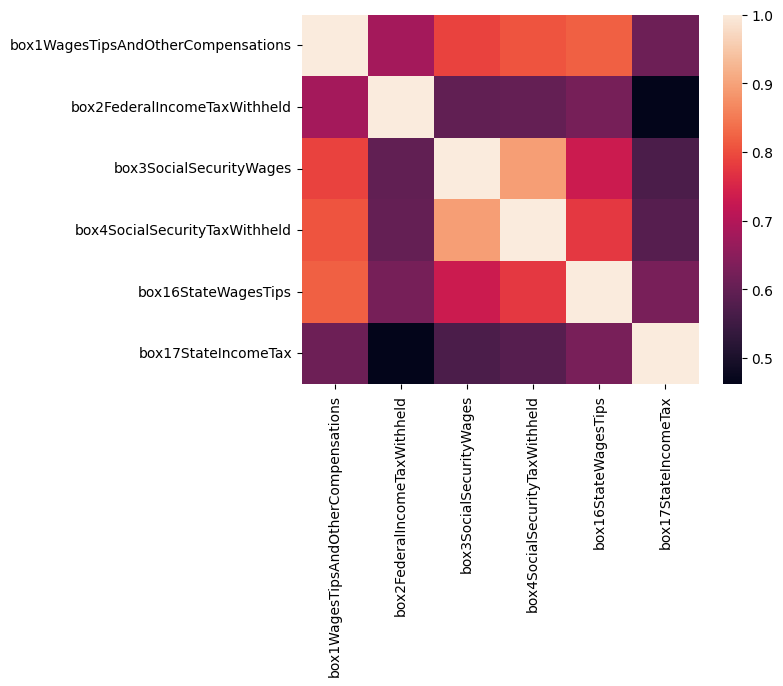

In [17]:
import seaborn as sns
sns.heatmap(new_df.corr())

<Axes: xlabel='box17StateIncomeTax', ylabel='Density'>

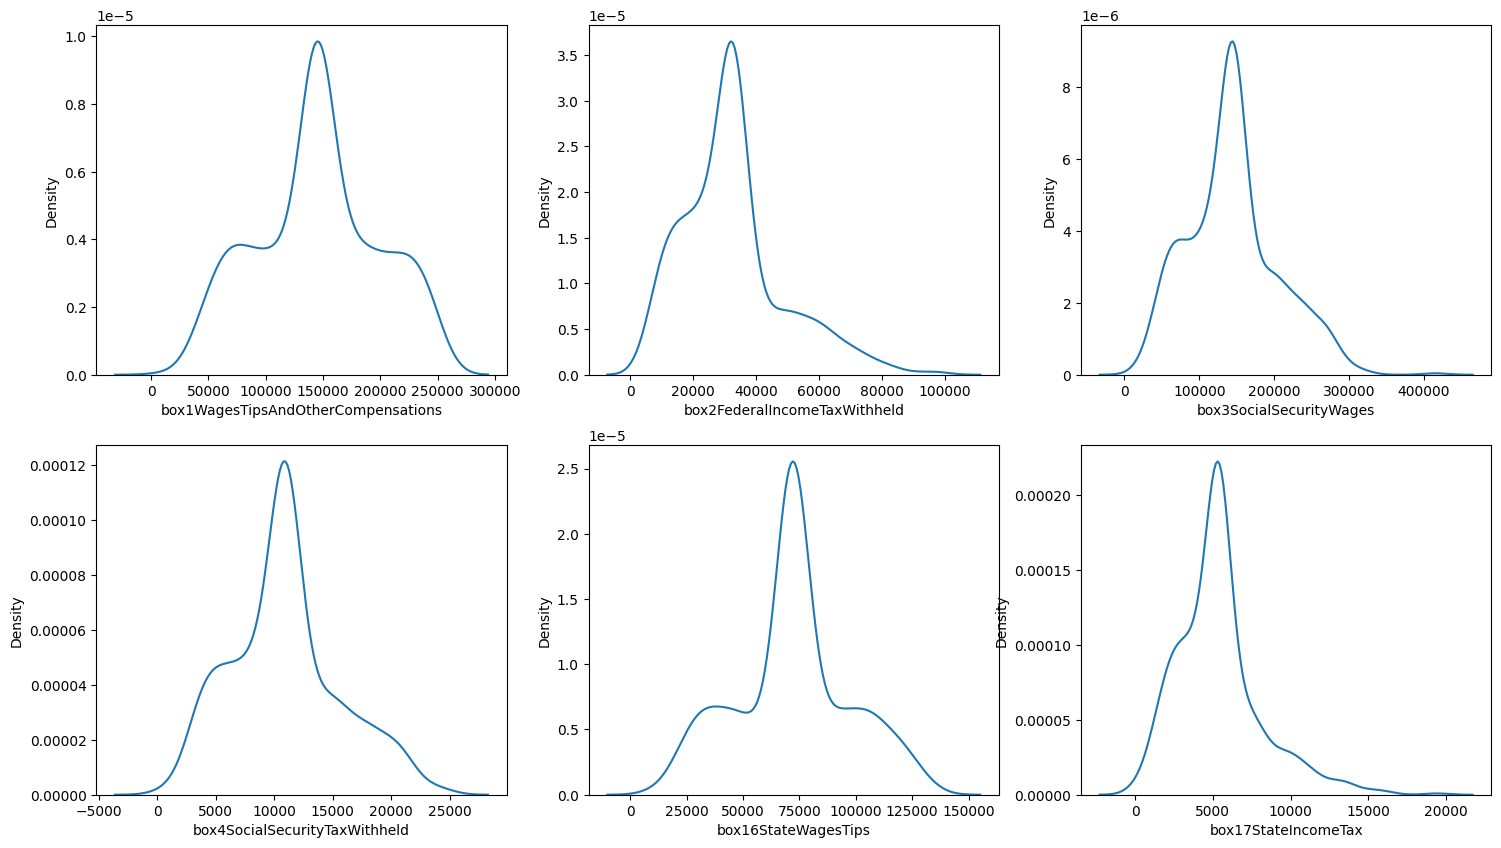

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.kdeplot(ax=axes[0, 0], data=new_df, x=col[0])
sns.kdeplot(ax=axes[0, 1], data=new_df, x=col[1]) # not normalised
sns.kdeplot(ax=axes[0, 2], data=new_df, x=col[2]) # not normalised
sns.kdeplot(ax=axes[1, 0], data=new_df, x=col[3])
sns.kdeplot(ax=axes[1, 1], data=new_df, x=col[4])
sns.kdeplot(ax=axes[1, 2], data=new_df, x=col[5]) # not normalised

## Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(new_df)

# transform train and test sets
new_df = scaler.transform(new_df)

In [20]:
new_df

array([[0.99125592, 0.47984374, 0.41018826, 0.56072184, 0.87722325,
        0.3847281 ],
       [0.56006399, 0.28577869, 0.63965092, 0.44308285, 0.49708792,
        0.27730982],
       [0.73494909, 0.60637158, 0.51834665, 0.69731552, 0.49708792,
        0.47646062],
       ...,
       [0.89368135, 0.77621284, 0.45557647, 0.618043  , 0.91217052,
        0.31216885],
       [0.56006399, 0.13871845, 0.32127444, 0.21367655, 0.49708792,
        0.27730982],
       [0.88079378, 0.18332365, 0.32127444, 0.68748675, 0.7579883 ,
        0.23229386]])

In [21]:
new_df = pd.DataFrame(new_df,columns=col)
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
0,0.991256,0.479844,0.410188,0.560722,0.877223,0.384728
1,0.560064,0.285779,0.639651,0.443083,0.497088,0.277310
2,0.734949,0.606372,0.518347,0.697316,0.497088,0.476461
3,0.560064,0.285779,0.179011,0.268767,0.497088,0.142515
4,0.665377,0.187799,0.321274,0.426296,0.591851,0.281378
...,...,...,...,...,...,...
595,0.873271,0.326164,0.594655,0.793686,0.735838,0.609031
596,0.776118,0.323007,0.460768,0.624599,0.717400,0.519734
597,0.893681,0.776213,0.455576,0.618043,0.912171,0.312169
598,0.560064,0.138718,0.321274,0.213677,0.497088,0.277310


## Outler Removal

In [22]:
before_dataframe = new_df.copy()

In [23]:
def outlier_removal(new_df):
    for i in range(len(col)):
        Q1 = new_df[col[i]].quantile(0.25)
        Q3 = new_df[col[i]].quantile(0.75)
        iqr =  Q3-Q1
        lower_limit = Q1-1.5*iqr
        upper_limit = Q3 + 1.5*iqr
        new_df[col[i]] = np.where(
            new_df[col[i]] > upper_limit,
            upper_limit,
            np.where(
                new_df[col[i]] < lower_limit,
                lower_limit,
                new_df[col[i]]
            )
        )
        plt.figure(figsize=(16,8))
        plt.subplot(2,2,1)
        sns.histplot(before_dataframe[col[i]],kde=True,stat='probability',legend=True)
        plt.title('Before Outlier Removal')


        plt.subplot(2,2,2)
        sns.histplot(new_df[col[i]],kde=True,stat='probability',legend=True)
        plt.title('After Outlier Removal')


        plt.show()

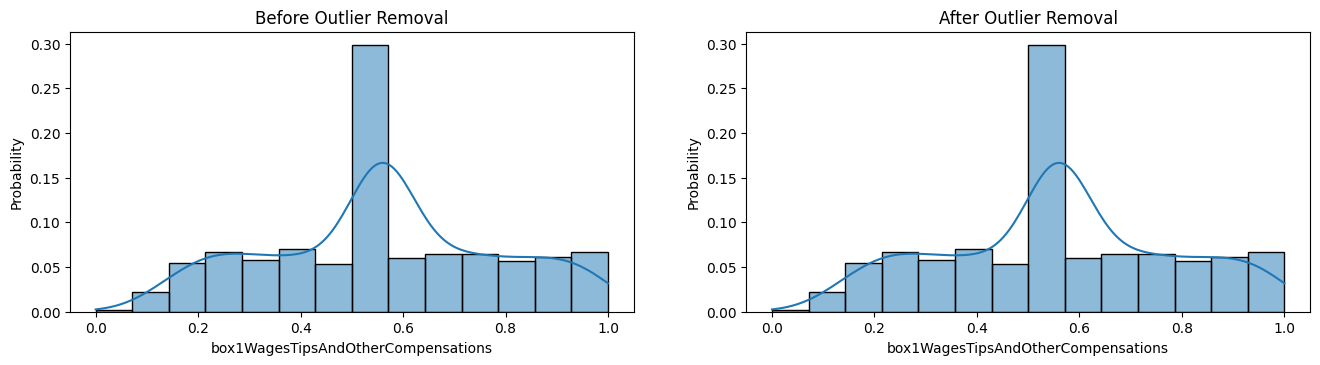

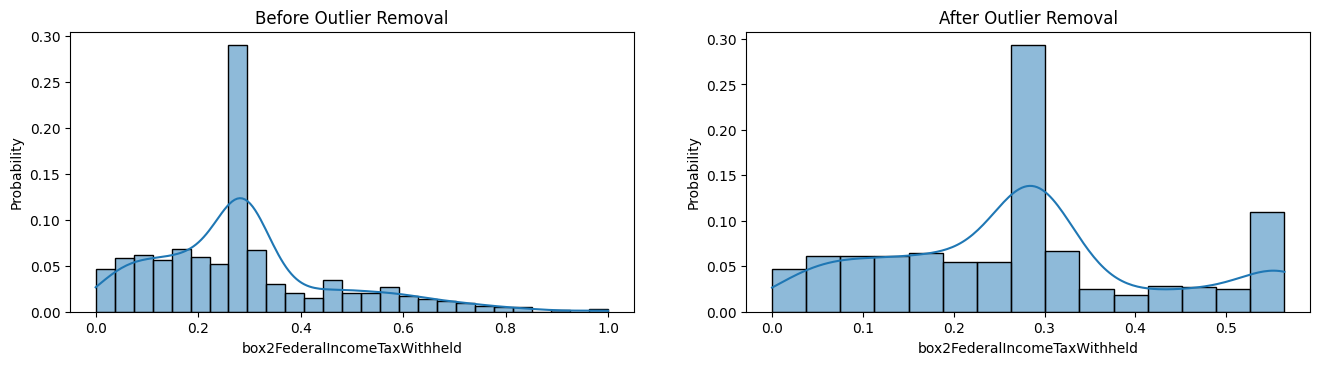

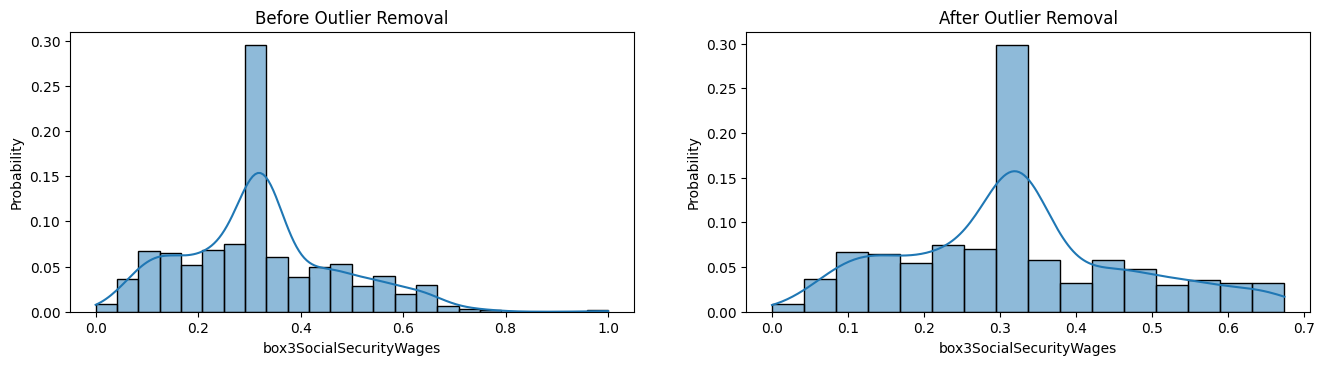

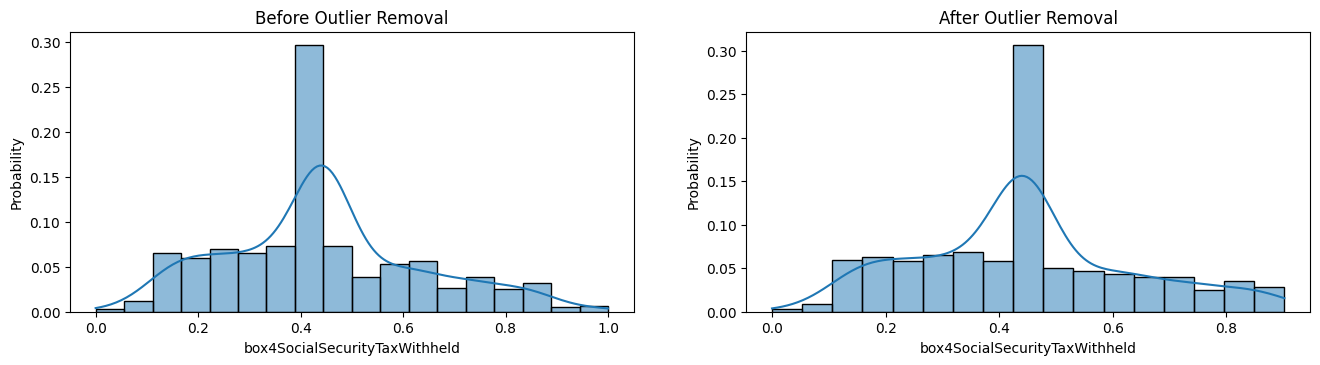

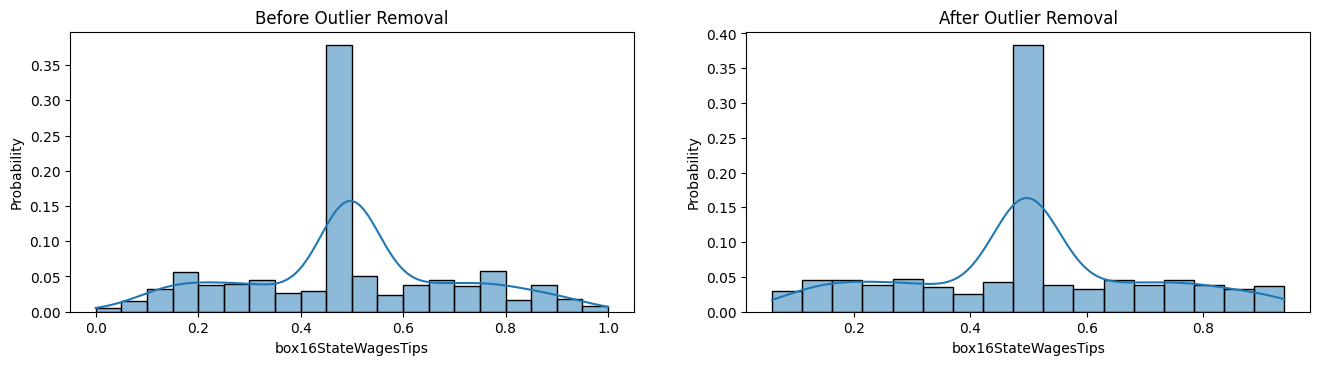

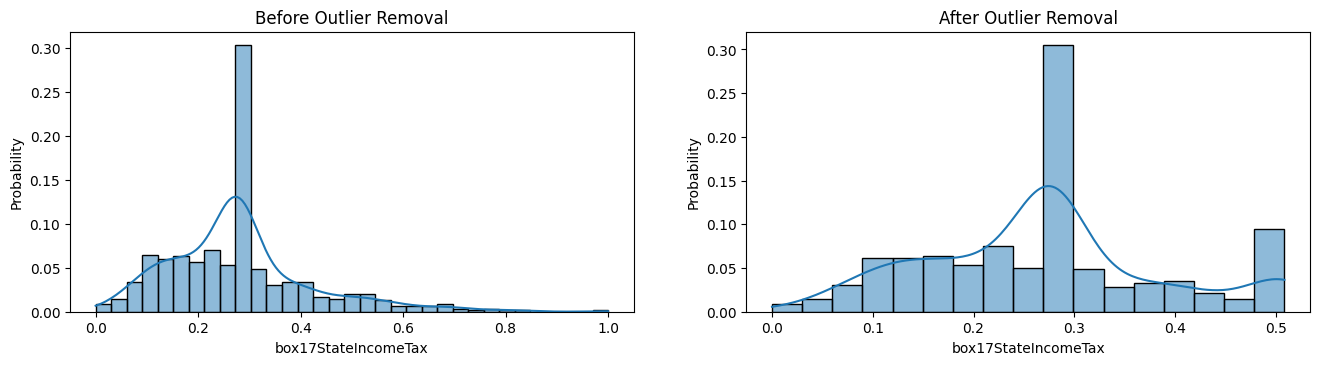

In [24]:
outlier_removal(new_df)

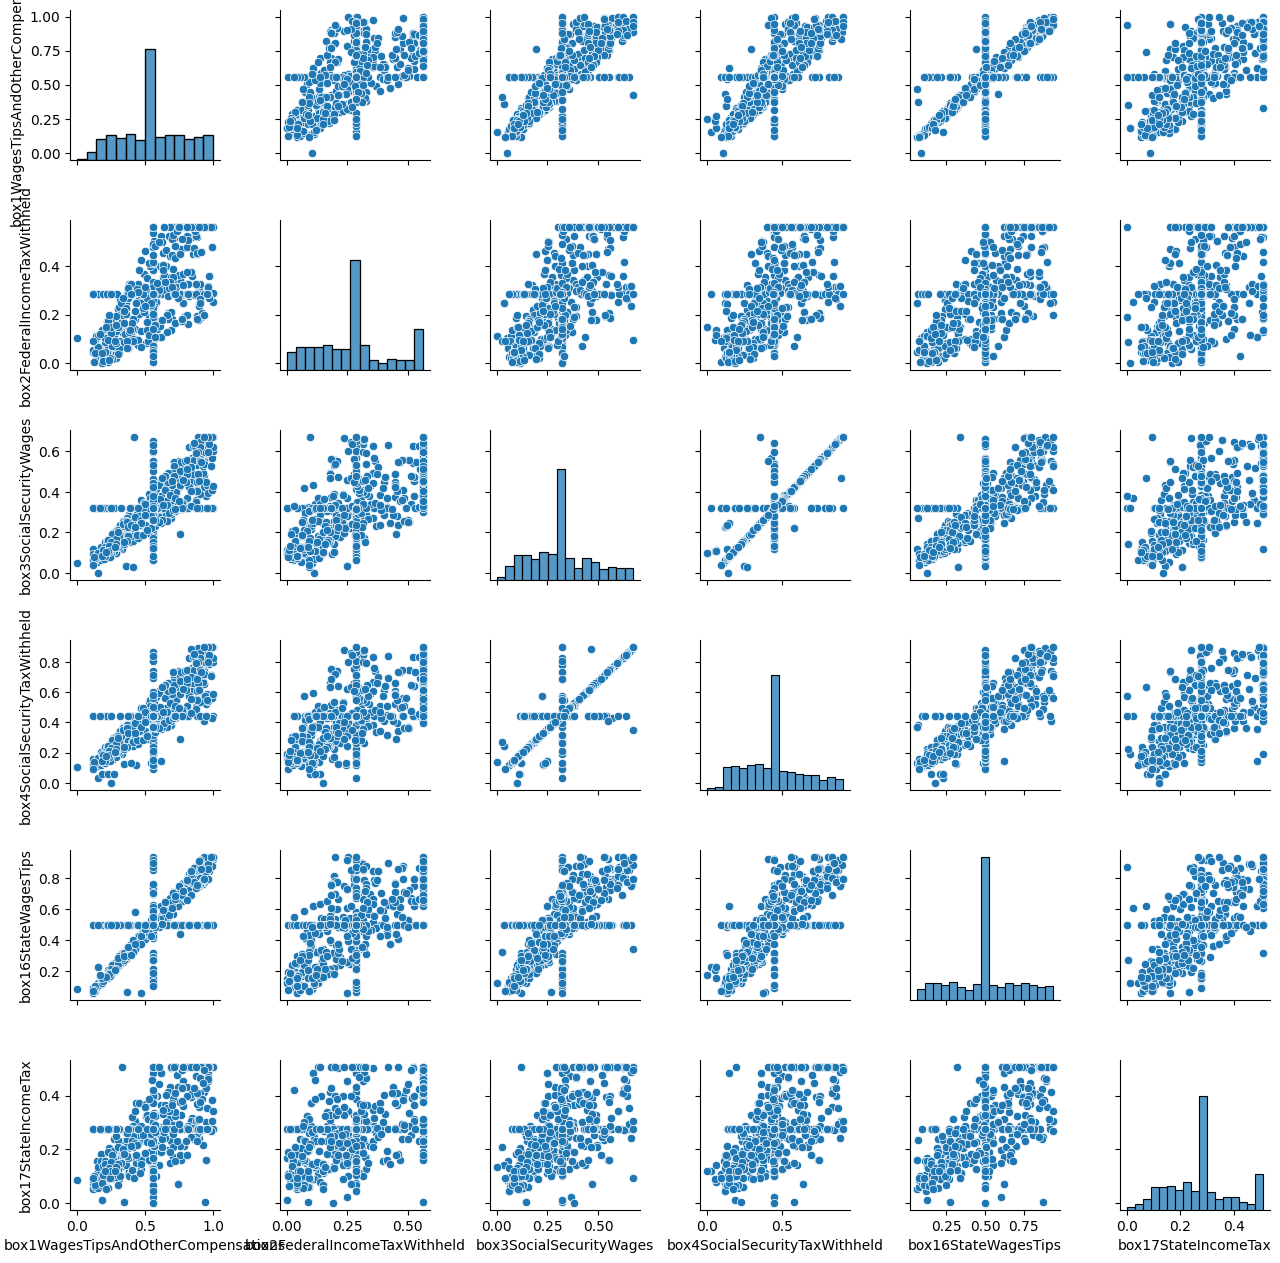

In [25]:
sns.pairplot(new_df)
plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

In [26]:
new_df

,box1WagesTipsAndOtherCompensations,box2FederalIncomeTaxWithheld,box3SocialSecurityWages,box4SocialSecurityTaxWithheld,box16StateWagesTips,box17StateIncomeTax
0,0.991256,0.479844,0.410188,0.560722,0.877223,0.384728
1,0.560064,0.285779,0.639651,0.443083,0.497088,0.277310
2,0.734949,0.564114,0.518347,0.697316,0.497088,0.476461
3,0.560064,0.285779,0.179011,0.268767,0.497088,0.142515
4,0.665377,0.187799,0.321274,0.426296,0.591851,0.281378
...,...,...,...,...,...,...
595,0.873271,0.326164,0.594655,0.793686,0.735838,0.508605
596,0.776118,0.323007,0.460768,0.624599,0.717400,0.508605
597,0.893681,0.564114,0.455576,0.618043,0.912171,0.312169
598,0.560064,0.138718,0.321274,0.213677,0.497088,0.277310


## In-Sight
   1. Looking into Pair Polt we can estimate that there are linear relationship amonf features like 
   2. box4SocialSecurityTaxWithheld vs box16StateWagesTips
   3. box1WagesTipsAndOtherCompensations vs  box16StateWagesTips etc..